# 인공신경망 실습 - 보스턴 주택가격 예측

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets
import random
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("재현을 위한 시드 고정:", SEED)

재현을 위한 시드 고정: 12


* 보스턴 주택가격 가져오기

In [2]:
boston = datasets.load_boston()

X_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])  #입력데이터 (13개의 변수들)
y_df = pd.DataFrame(boston['target'], columns=['Target']) 

print("x데이터 형태", X_df.shape)
print("y데이터 형태", y_df.shape)

x데이터 형태 (506, 13)
y데이터 형태 (506, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

* 훈련데이터와 테스트데이터로 분리

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, shuffle=True)
print('훈련데이터 X와 y의 차원: ', X_train.shape, y_train.shape)
print('테스트데이터 X와 y의 차원: ', X_test.shape, y_test.shape)

훈련데이터 X와 y의 차원:  (404, 13) (404, 1)
테스트데이터 X와 y의 차원:  (102, 13) (102, 1)


* 다층 퍼셉트론 모형 설정

In [4]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_df.shape[1])) #첫번째 층에 노드의 개수를 32개로 하고, 렐루 함수 사용
model.add(Dense(16, activation='relu'))                          #두번째 층 
model.add(Dense(8, activation='relu'))                           #세번째 층
model.add(Dense(1, activation='linear'))                         #출력층: 주택가격  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


* 학습 조건 설정 후 파라미터 학습: 최소제곱오차 MSE를 최소화 하는 방향으로

In [5]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)  # 20% 검증데이터- mse값 계산

Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 593.9630 - val_loss: 285.9378
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 174.5347 - val_loss: 80.6576
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 103.9410 - val_loss: 75.5560
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 95.5685 - val_loss: 64.4619
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 73.2163 - val_loss: 59.6392
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 70.7356 - val_loss: 60.6592
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 69.5342 - val_loss: 60.9704
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 67.4492 - val_loss: 59.0815
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 65.1733 - val_loss: 57.9783
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 63.9305 - va

* 테스트데이터를 이용한 모형 평가

In [6]:
model.evaluate(X_test, y_test) # MSE 값 - 크게나옴 별로 안 좋음. 학습량을 늘리면 줄어든다.

4/4 [==============================] - 0s 3ms/step - loss: 50.4264


50.42644119262695

* 훈련데이터와 검증데이터의 MSE값 변화

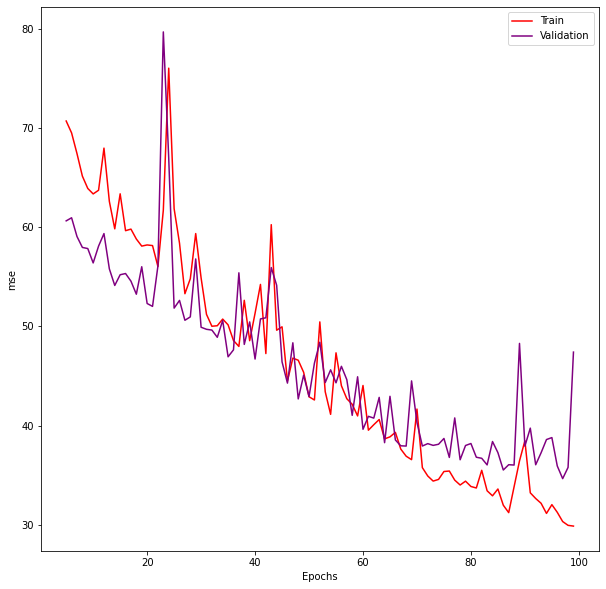

In [8]:
plt.figure(figsize=(10,10))
plt.plot(range(5,100), history.history['loss'][5:], label='Train', color='red')          # epoch 5부터
plt.plot(range(5,100), history.history['val_loss'][5:], label='Validation', color='purple')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()